This is the second half of the module 3 assignment. The full module 3 assignment will be due on Wednesday, February 23 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas. 

1. We discussed in class solving systems of coupled first order ODEs using Euler and 2nd order Runge-Kutta methods. Here, you'll look at a famous and slightly more complex model for describing predator-prey dynamics in an ecosystem.

The Lotka-Volterra model describes a prey animal species, $x$, whose population grows at a growth rate, $r$, proportional to the population in the absence of predators. When a predator species, $y$, is present, however, there is second term that describes predation, which acts to decrease the prey population. The predation rate, $axy$, is proportional to (1) the number of predators (more predators will consume more prey) and (2) the number of prey (the prey population size affects how much the predators can eat).  

The dynamics of the number of the prey for this model is given by:

$\frac{dx}{dt} = rx - axy$

The number of predators also changes with time. Here, the predator growth rate, $b$, is proportional to (1) the total number of predators (more predators can produce more offspring), and (2) the number of prey (more available food also leads to more offspring). While there is nothing to prey upon the predators, they do die of natural causes at a rate, $d$, which is proportional to the population of predators (more predators means more death).

The dynamics of the number of predators for this model is given by: 

$\frac{dy}{dt} = b x y - d y$.

While the cross-term makes this system nonlinear and prevents us from representing this as a matrix equation, we can still solve this system of equations using the Euler and Runge-Kutta methods.






(a) write a function that solves this equation using the Euler method. Inputs to your function should include $r$, $a$, $b$, $d$, a time array, $t$, which contains uniformly spaced time points between $t = 0$ and $t=T$, and an initial condition array for both $x$ and $y$ populations. Your function should output $x$ and $y$ as a function of time.

In [ ]:
def eulerPred(r,a,b,d,x0,y0,t):
  xs = np.zeros(len(t))
  ys = np.zeros(len(t))
  dt = t[1]-t[0]
  xs[0]=x0
  ys[0]=y0
  for i in range(len(t)-1):
    xs[i+1]=xs[i]+dt*(r*xs[i]-a*xs[i]*ys[i])
    ys[i+1]=ys[i]+dt*(b*xs[i]*ys[i]-d*ys[i])

  return xs,ys

(b) write a function similar to the one in (a), but here use the 2nd order Runge-Kutta method.

In [ ]:
def rk2Pred(r,a,b,d,x0,y0,t):
  xs = np.zeros(len(t))
  ys = np.zeros(len(t))
  dt = t[1]-t[0]
  xs[0]=x0
  ys[0]=y0

  for i in range(len(t)-1):
    xPred=xs[i]+dt*(r*xs[i]-a*xs[i]*ys[i])
    yPred=ys[i]+dt*(b*xs[i]*ys[i]-d*ys[i])

    xPrime=r*xs[i]-a*xs[i]*ys[i]
    yPrime=b*xs[i]*ys[i]-d*ys[i]

    xPrimePred=r*xPred-a*xPred*yPred
    yPrimePred=b*xPred*yPred-d*yPred

    xs[i+1]=xs[i]+0.5*dt*(xPrime+xPrimePred)
    ys[i+1]=ys[i]+0.5*dt*(yPrime+yPrimePred)


  return xs,ys

(c) Run both functions for the parameter values below. How do the results compare for the two integration techniques?

$x_0 = 5$

$y_0 = 5$

$dt = 0.001$                  
$T = 10.0$        
         
$r = 7.0$                      
$a = 2.0$                       
$b = 1.5$                       
$d = 3.0$   

Over time, small errors in the Euler prediction method compound and we can observe noticable deviations. In the x vs y graph, this appears as a gradual outward spiral. Meanwhile, the RK2 prediction method remains stable over time. 

In [ ]:
import numpy as np

x0=5 
y0=5 

dt=0.001 
T=10.0 

r=7.0 
a=2.0 
b=1.5 
d=3.0

t=np.arange(0,T,dt)

[xEuler,yEuler]=eulerPred(r,a,b,d,x0,y0,t)
[xRK2,yRK2]=rk2Pred(r,a,b,d,x0,y0,t)


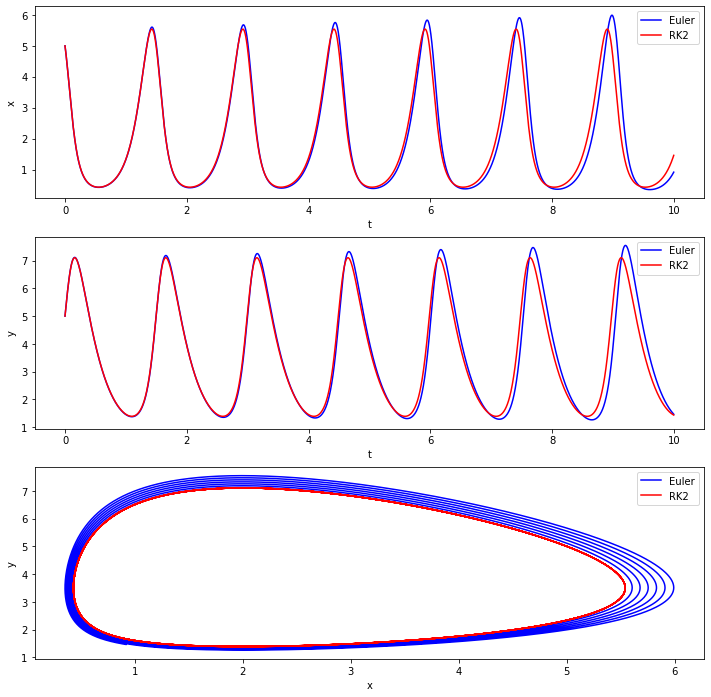

In [ ]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(3)
fig.set_size_inches(12,12)

ax[0].plot(t,xEuler,color='blue',label="Euler")
ax[0].plot(t,xRK2,color='red',label='RK2')
ax[0].set(xlabel='t',ylabel='x')
ax[0].legend()

ax[1].plot(t,yEuler,color='blue',label="Euler")
ax[1].plot(t,yRK2,color='red',label='RK2')
ax[1].set(xlabel='t',ylabel='y')
ax[1].legend()

ax[2].plot(xEuler,yEuler,color='blue',label="Euler")
ax[2].plot(xRK2,yRK2,color='red',label='RK2')
ax[2].set(xlabel='x',ylabel='y')
ax[2].legend()

plt.show()

(d) decrease the timestep to $dt = 0.0001$ and re-run both techniques.  Do you notice any changes? Does one method appear better than the other, and if so, why?

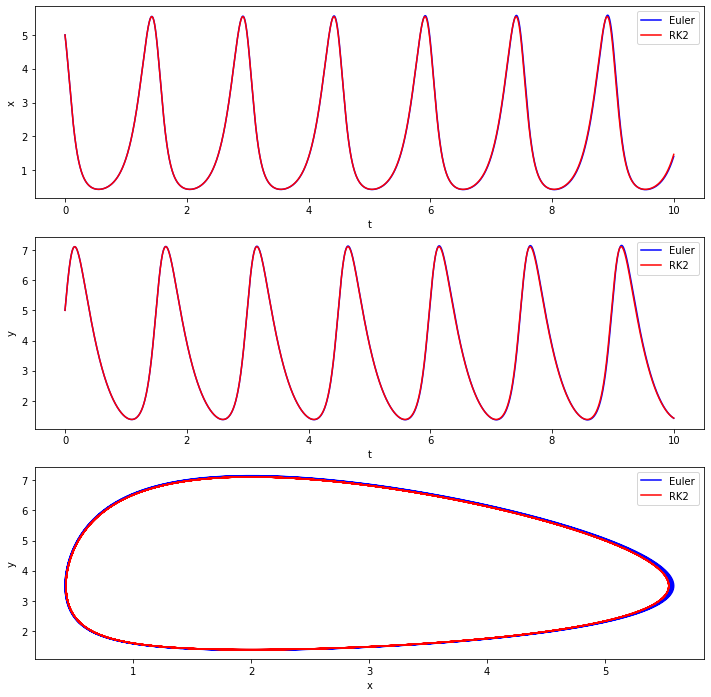

In [ ]:
x0=5 
y0=5 

dt=0.0001 
T=10.0 

r=7.0 
a=2.0 
b=1.5 
d=3.0

t=np.arange(0,T,dt)

[xEuler,yEuler]=eulerPred(r,a,b,d,x0,y0,t)
[xRK2,yRK2]=rk2Pred(r,a,b,d,x0,y0,t)

fig,bx=plt.subplots(3)
fig.set_size_inches(12,12)


bx[0].plot(t,xEuler,color='blue',label="Euler")
bx[0].plot(t,xRK2,color='red',label='RK2')
bx[0].set(xlabel='t',ylabel='x')
bx[0].legend()

bx[1].plot(t,yEuler,color='blue',label="Euler")
bx[1].plot(t,yRK2,color='red',label='RK2')
bx[1].set(xlabel='t',ylabel='y')
bx[1].legend()

bx[2].plot(xEuler,yEuler,color='blue',label="Euler")
bx[2].plot(xRK2,yRK2,color='red',label='RK2')
bx[2].set(xlabel='x',ylabel='y')
bx[2].legend()

plt.show()


As the time interval decreases, the difference between the two methods becomes smaller. This is because the RK2 method's advantage of correcting for error over the timestep becomes minimized when the time step becomes sufficiently small.

2. While we cannot solve this system analytically to verify our numerical results, there are some tests we can do to see if our model implementation makes sense. This question will explore some of these checks.

(a) A *fixed point* is a defined by a location where the derivates equal 0 (and therefore the dynamics are not changing).  Find the values for $x$ and $y$ (in terms of other parameters in the system) associated with fixed points.  Choose a parameter that satisfies these conditions, and run your two methods. How do the populations change through time? Does the system behave the way you expect?

$\frac{dx}{dt}=rx-axy$

$\frac{dy}{dt}=bxy-dy$

$\frac{dx}{dt}=x(r-ay)$

$\frac{dy}{dt}=y(bx-d)$

---

$\frac{dy}{dt}=0: y=0, x=\frac{d}{b}$

$\frac{dx}{dt}=0: x=0, y=\frac{r}{a}$

----

Given the initial parameters r, a, b, d, the points $(0,0)$ and $(\frac{d}{b},\frac{r}{a})$ represent fixed points. If both populations start at these points, they are both stable and there is no change over time. Graphing the differential equations with the initial parameters set at $(\frac{d}{b},\frac{r}{a})$, we observe that dy/dt and dx/dt are constant at 3.5 and 2, respectively. 

This makes sense from a population dynamics perspective - the point d/b, r/a is a balancing point where both species are growing/dying at a net zero rate, while if you start with zero of both species there will obviously be no change in population over time.  

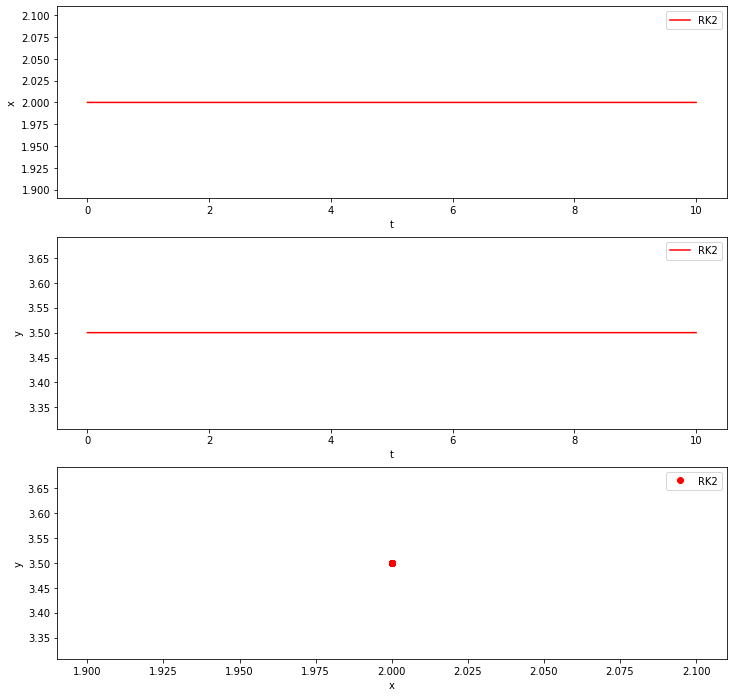

In [ ]:


dt=0.001 
T=10.0 

r=7.0 
a=2.0 
b=1.5 
d=3.0

x0=d/b
y0=r/a

t=np.arange(0,T,dt)

[xEuler,yEuler]=eulerPred(r,a,b,d,x0,y0,t)
[xRK2,yRK2]=rk2Pred(r,a,b,d,x0,y0,t)

fig,cx=plt.subplots(3)
fig.set_size_inches(12,12)


cx[0].plot(t,xRK2,color='red',label='RK2')
cx[0].set(xlabel='t',ylabel='x')
cx[0].legend()

cx[1].plot(t,yRK2,color='red',label='RK2')
cx[1].set(xlabel='t',ylabel='y')
cx[1].legend()

cx[2].plot(xRK2,yRK2,'o',color='red',label='RK2')
cx[2].set(xlabel='x',ylabel='y')
cx[2].legend()

plt.show()


(b) Think about the equations that describe this model, and discuss your expectations for the large and small limits of each parameter. Test your intuition by running your RK2 code, plotting the results, and discussing what happens to the populations.  Is this consistent with your expectations? 

$\frac{dx}{dt} = x(r - ay)$

$\lim_{x\to\ 0}x(r-ay)=0$

$\lim_{x\to\infty}x(r-ay)=\infty$

$\lim_{y\to\ 0}x(r-ay)=rx$

$\lim_{y\to\infty}x(r-ay)=\pm\infty$

$\frac{dy}{dt} = y(b x - d)$.

$\lim_{x\to\ 0}y(bx-d)=-dy$

$\lim_{x\to\infty}y(bx-d)=\infty$

$\lim_{y\to\ 0}y(bx-d)=0$

$\lim_{y\to\infty}y(bx-d)=\pm\infty$

As x approaches zero while y remains at some fixed value, dx/dt will approach zero while dy/dt will approach -d*y. As y approaches zero, dy/dt also approaches zero while dx/dt approaches rx.

As y approaches infinity, dy/dt approaches positive or negative infinity depending on the sign of (bx-d) and dx/dt approaches negative infinity. As x approaches infinity, dx/dt approaches positive or negative infinity depending on the sign of (r-ay) and dy/dt approaches positive infinity.

These predicitons are basically consistent with our tests. For example when we set x to a very small value, y initially decreases as expected and x remains constant at approximately zero. However, we observed the population of x eventually begins to increase once y is sufficiently small. In the context of competing species, this makes sense because once a predator species dies out due to starvation the prey species can rebuild their population.  

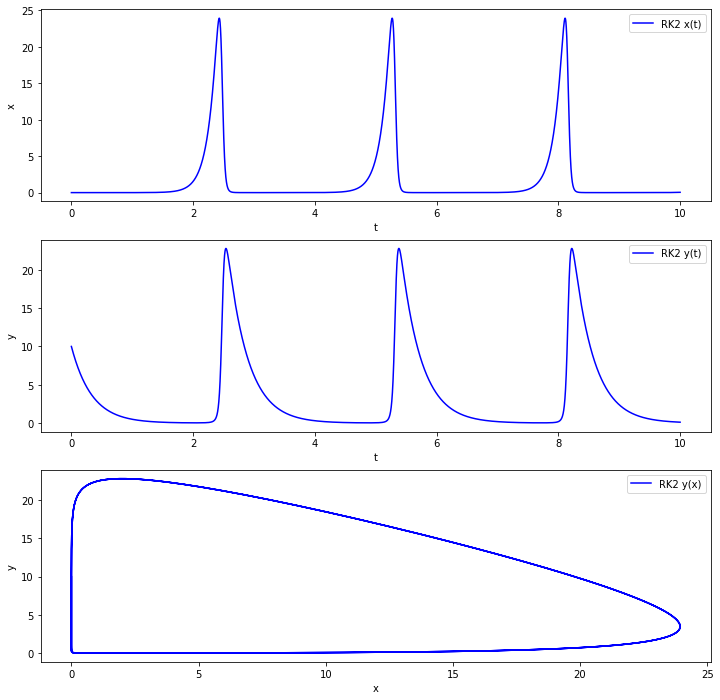

In [ ]:
dt=0.001
T=10

r=7.0 
a=2.0 
b=1.5 
d=3.0

x0=0.001
y0=10
t=np.arange(0,T,dt)

[xEuler,yEuler]=eulerPred(r,a,b,d,x0,y0,t)
[xRK2,yRK2]=rk2Pred(r,a,b,d,x0,y0,t)


fig,cx=plt.subplots(3)
fig.set_size_inches(12,12)


cx[0].plot(t,xRK2,color='blue',label='RK2 x(t)')
cx[0].set(xlabel='t',ylabel='x')
cx[0].legend()

cx[1].plot(t,yRK2,color='blue',label='RK2 y(t)')
cx[1].set(xlabel='t',ylabel='y')
cx[1].legend()

cx[2].plot(xRK2,yRK2,color='blue',label='RK2 y(x)')
cx[2].set(xlabel='x',ylabel='y')
cx[2].legend()

plt.show()

(c) What might you expect for small deviations from the fixed points you found in part (a) and why? Test your predictions by running your code for a parameter set that is not quite consistent with a fixed point. Qualitatively describe the resulting population dynamics? Does this agree with your intuition?

Based on the behavior in our limit tests, it's likely that these zero-points are unstable equilibriums. Testing these points reveals that for small deviations in either x or y from the point (d/b,r/a), or in both x and y from the point (0,0), cyclical population behavior will emerge.

Again, this makes sense in the context of competing predator/prey species. If there are no predators, a prey species will grow indefinitely. If there are no prey, a predator species will die out. 

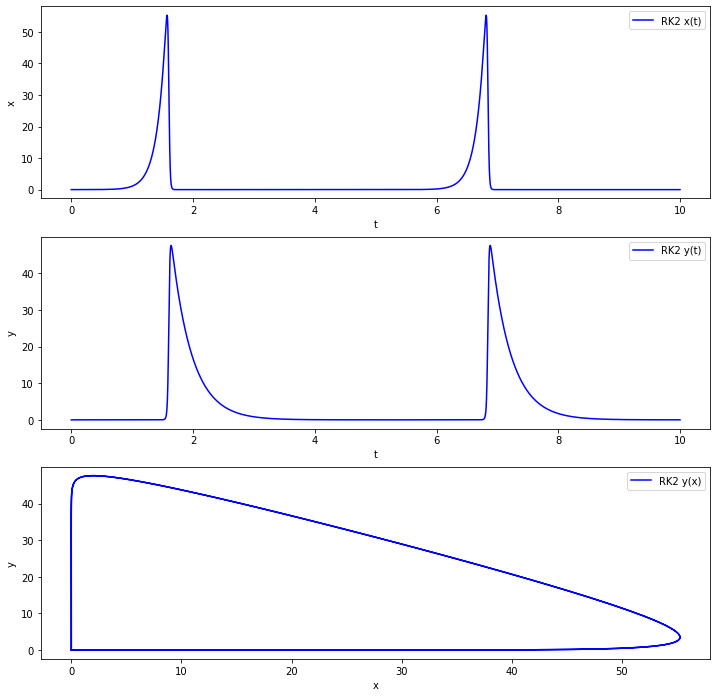

In [ ]:
dt=0.001
T=10

r=7.0 
a=2.0 
b=1.5 
d=3.0

x0=0.001
y0=0.001

t=np.arange(0,T,dt)

[xEuler,yEuler]=eulerPred(r,a,b,d,x0,y0,t)
[xRK2,yRK2]=rk2Pred(r,a,b,d,x0,y0,t)


fig,cx=plt.subplots(3)
fig.set_size_inches(12,12)


cx[0].plot(t,xRK2,color='blue',label='RK2 x(t)')
cx[0].set(xlabel='t',ylabel='x')
cx[0].legend()

cx[1].plot(t,yRK2,color='blue',label='RK2 y(t)')
cx[1].set(xlabel='t',ylabel='y')
cx[1].legend()

cx[2].plot(xRK2,yRK2,color='blue',label='RK2 y(x)')
cx[2].set(xlabel='x',ylabel='y')
cx[2].legend()

plt.show()